# DERIVATIVES PROJECT

*by Najmeddine ABBASSI, Elyes TRABELSI, Aziz LAADHAR, Lucas SIMONNET*

### Necessary imports

In [1]:
import numpy as np
import pandas as pd
from scipy.integrate import quad
from scipy.optimize import minimize
import matplotlib.pyplot as plt

## QUESTION 6

### Futures prices in a VIX futures as a function of time to maturity, the current squared volatility $V_t$ , and the parameters (λ, θ, ξ) of the squared volatility process

In [2]:
#We define some constants that will be used for all the questions 
TRADING_DAYS = 252
ETA = 30/TRADING_DAYS

In [3]:
def vix_futures_price(maturity, Vt, l, theta, xi):
    """
    Calculate VIX futures price using Laplace transform approach
    
    Parameters:
    Vt (float): current squared volatility
    maturity (float): time to maturity (in years)
    l (float): mean reversion speed
    theta (float): long-term mean variance
    xi (float): volatility of volatility
    eta (float): VIX calculation period (30 days by default)
    
    Returns:
    float: VIX futures price
    """
    b = (1-np.exp(-l*ETA))/l
    a = theta*(ETA-b)
    
    def integral_func(s):
        # First, we solve the Riccati ODEs from 3.2:
        coeff = l*theta*2/(xi**2)
        denom = 2*l-s*b*(xi**2)*(np.exp(l*maturity)-1)
        if denom <= 0.0:                  
            c = np.inf
        else:
            c = coeff*np.log(denom)-coeff*np.log(2*l)
        d = (2*s*b*l*np.exp(l*maturity))/denom
        # Then, we calculate l(s, maturity, Vt) = c + d*Vt + s*a
        l_func = s*a+c+d*Vt
        if np.isinf(l_func):
            return 1/np.sqrt(s**3)
        return (1 - np.exp(-l_func)) / np.sqrt(s**3)
    
    integral, error = quad(integral_func, 0, np.inf, limit=1000)
    return (50 / np.sqrt(np.pi*ETA)) * integral

### Numerical Analysis

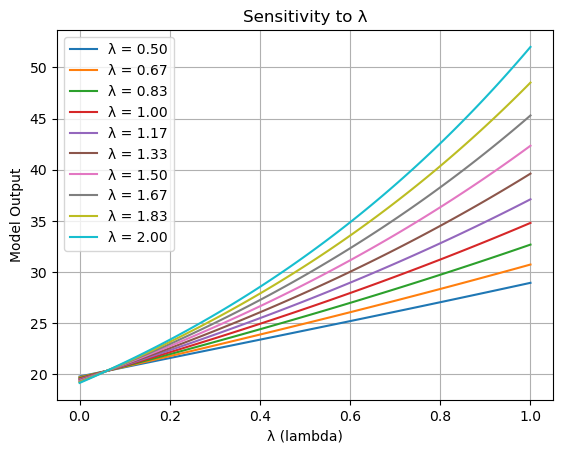

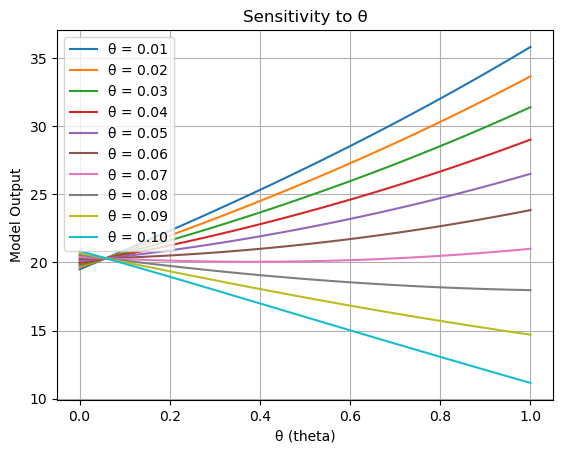

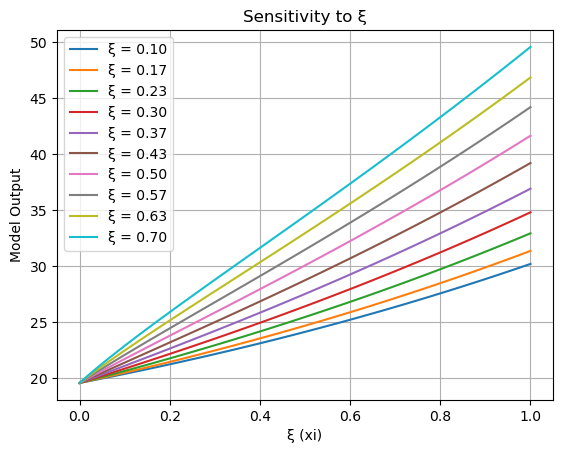

In [4]:
# Base values
base = {
    'V_t':0.04, 
    'lambda': 1.0, 
    'theta': 0.01, 
    'xi': 0.3
}

# Parameter ranges
lambda_range = np.linspace(0.5, 2.0, 10)
theta_range = np.linspace(0.005, 0.1, 10)
xi_range = np.linspace(0.1, 0.7, 10)
maturity = np.linspace(0, 1.0, 100)

for lam in lambda_range:
    res = pd.Series([vix_futures_price(m, base['V_t'], lam, base['theta'], base['xi']) for m in maturity])
    plt.plot(maturity, res, label=f"λ = {lam:.2f}")
plt.xlabel('λ (lambda)')
plt.ylabel('Model Output')
plt.title('Sensitivity to λ')
plt.grid(True)
plt.legend()
plt.show()

for theta in theta_range:
    res = pd.Series([vix_futures_price(m, base['V_t'], base['lambda'], theta, base['xi']) for m in maturity])
    plt.plot(maturity, res, label=f"θ = {theta:.2f}")
plt.xlabel('θ (theta)')
plt.ylabel('Model Output')
plt.title('Sensitivity to θ')
plt.grid(True)
plt.legend()
plt.show()

for xi in xi_range:
    res = pd.Series([vix_futures_price(m, base['V_t'], base['lambda'], base['theta'], xi) for m in maturity])
    plt.plot(maturity, res, label=f"ξ = {xi:.2f}")
plt.xlabel('ξ (xi)')
plt.ylabel('Model Output')
plt.title('Sensitivity to ξ')
plt.grid(True)
plt.legend()
plt.show()

As we can see, numerically :
- **λ:** Higher values cause long-term VIX futures prices to rise more sharply, as volatility adjusts faster to its long-term level. This reflects how quickly markets expect extreme volatility to normalize, with short-term contracts showing less sensitivity because mean reversion has less time to act.  

- **θ:** When θ increases, futures prices decrease if the current volatility is higher, as the expected future volatility moves closer to θ. This anchoring effect is most visible in long-dated contracts, where small changes in θ significantly reshape the term structure.  

- **ξ:** Larger ξ leads to higher futures prices across all maturities, as increased uncertainty raises the expected future volatility. The effect compounds over time, making long-dated contracts particularly responsive to changes in ξ.

## QUESTION 7

### Futures prices in Variance futures as a function of time to maturity T − t, the accrued variance $\int_{t_0}^t (100\sqrt(V_U)^2du$, the current squared volatility $V_t$ , and the parameters (λ, θ, ξ) of the squared volatility process

In [5]:
def variance_futures_price(maturity, accrued_variance, Vt, l, theta, xi, total_time):
    """
    Calculate Variance futures price
    
    Parameters:
    accrued_variance (float): already realized variance
    Vt (float): current squared volatility
    maturity (float): time remaining to maturity (in years)
    total_timr (float): 
    l (float): mean reversion speed
    theta (float): long-term mean variance
    xi (float): volatility of volatility
    
    Returns:
    float: Variance futures price
    """
    b_star = (1-np.exp(-l*maturity))/l
    a_star = theta*(maturity-b_star)
    return (accrued_variance+10000*(a_star+b_star*Vt))/total_time

### Graphical Analysis

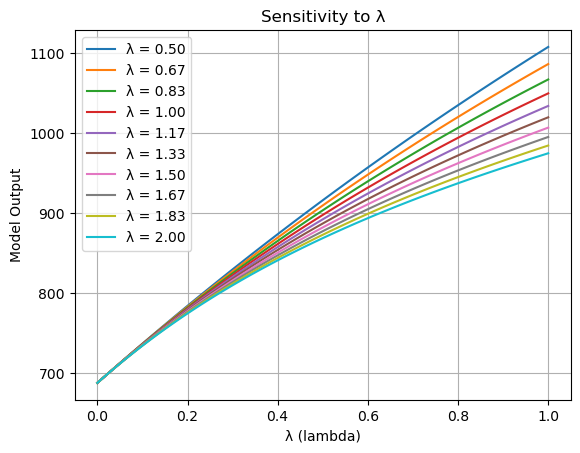

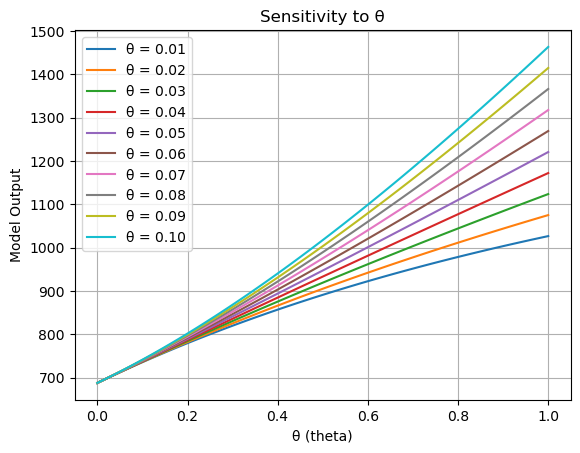

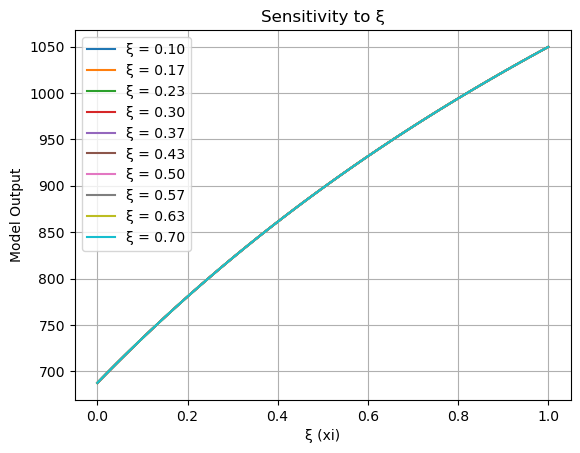

In [6]:
# Base values
base = {
    'V_t':0.04,
    'lambda': 1.0,
    'theta': 0.01,
    'xi': 0.3,
    'accrued_var':550,
    'total_time':0.8
}
# Parameter ranges
lambda_range = np.linspace(0.5, 2, 10)
theta_range = np.linspace(0.005, 0.1, 10)
xi_range = np.linspace(0.1, 0.7, 10)
maturity = np.linspace(0, 1.0, 100)


lambda_results = []

for lam in lambda_range:
    res = variance_futures_price(maturity, base['accrued_var'], base['V_t'], lam, base['theta'], base['xi'], base['total_time'])
    lambda_results.append(res)
    plt.plot(maturity, res, label=f"λ = {lam:.2f}")
plt.xlabel('λ (lambda)')
plt.ylabel('Model Output')
plt.title('Sensitivity to λ')
plt.grid(True)
plt.legend()
plt.show()

theta_results = []

for theta in theta_range:
    res = variance_futures_price(maturity, base['accrued_var'], base['V_t'], base['lambda'], theta, base['xi'], base['total_time'])
    theta_results.append(res)
    plt.plot(maturity, res, label=f"θ = {theta:.2f}")
plt.xlabel('θ (theta)')
plt.ylabel('Model Output')
plt.title('Sensitivity to θ')
plt.grid(True)
plt.legend()
plt.show()

xi_results = []

for xi in xi_range:
    res = variance_futures_price(maturity, base['accrued_var'], base['V_t'], base['lambda'], base['theta'], xi, base['total_time'])
    xi_results.append(res)
    plt.plot(maturity, res, label=f"ξ = {xi:.2f}")
plt.xlabel('ξ (xi)')
plt.ylabel('Model Output')
plt.title('Sensitivity to ξ')
plt.grid(True)
plt.legend()
plt.show()

As we can see, graphically :

- **λ:** There is an inverse relationship between λ values and curve trajectories, with higher λ producing lower, more curved paths that systematically diverge from a common origin point, demonstrating λ's delayed yet growing influence on volatility expectations as maturity progresses.
- **θ:** We see that the trajectories are changing direction based on θ values, with lower settings creating falling curves and higher settings producing rising ones, all transitioning through a neutral middle range (~θ=0.05) where the path becomes nearly flat, revealing how different long-term variance assumptions systematically alter the curve's orientation while maintaining similar curvature shapes across values.  
- **ξ:** The Variance futures price depends only on λ and θ. There is no diffusion term so ξ does not have any impact as we can see with all the curves perfectly identical.

## QUESTION 8

### Loading Data

In [7]:
with pd.ExcelFile("../data/Fin404-2025-VIXNCO-Data.xlsx", engine="openpyxl") as xls:
    var = pd.read_excel(xls, sheet_name=0, skiprows=4, nrows=8, usecols="B:H")
    vix = pd.read_excel(xls, sheet_name=0, skiprows=15, nrows=9, usecols="B:E")

In [8]:
vix.columns = ['SYMBOL', 'EXPIRATION', 'SETTLEMENT', 'Maturity']

In [9]:
var.columns = ['SYMBOL', 'EXPIRATION', 'SETTLEMENT', 'ACCRUED', 'Total',
       'Elapsed', 'Remaining']

### Calibration

In [10]:
# Convert days to years
var['total_years'] = var['Total'] / TRADING_DAYS
var['elapsed_years'] = var['Elapsed'] / TRADING_DAYS
var['remaining_years'] = var['Remaining'] / TRADING_DAYS
vix['maturity_years'] = vix['Maturity'] / TRADING_DAYS

def calibration_error(params):
    """
    Calculate error between model prices and market prices
    """
    Vt, l, theta, xi = params
    errors = []
    
    # Convert accrued from annualized to total
    accrued_total = var['ACCRUED'] * var['elapsed_years']
    
    # Calculate model price
    model_price_var = variance_futures_price( 
        var['remaining_years'],
        accrued_total,
        Vt,
        l,
        theta,
        xi,
        var['total_years']
    )

    # Add squared error
    errors = (model_price_var - var['SETTLEMENT'])**2

    model_price_vix = pd.Series([vix_futures_price( 
            maturity,
            Vt,
            l,
            theta,
            xi,
        ) for maturity in vix['maturity_years']])
    errors = pd.concat([errors,(model_price_vix - vix['SETTLEMENT'])**2],ignore_index=True)
    error = np.sqrt(errors.mean())
    return error

# Initial parameter guesses
initial_params = [0.04, 1.5, 0.05, 0.2]  # Vt, lambda, theta, xi

# Bounds for parameters (Vt > 0, lambda > 0, theta > 0, xi > 0)
bounds = [(0.001, None), (0.001, None), (0.001, None), (0.001, None)]

# Perform calibration
result = minimize(calibration_error, initial_params, bounds=bounds)

# Extract calibrated parameters
Vt_calib, l_calib, theta_calib, xi_calib = result.x
print(f"Calibrated Parameters:")
print(f"Current variance (Vt): {Vt_calib:.6f}")
print(f"Mean reversion speed (λ): {l_calib:.4f}")
print(f"Long-term mean variance (θ): {theta_calib:.6f}")
print(f"Volatility of volatility (ξ): {xi_calib:.4f}")

print(f"Mean-Squared Error of the calibrated parameters : {result.fun:.4f}")

Calibrated Parameters:
Current variance (Vt): 0.049605
Mean reversion speed (λ): 1.4977
Long-term mean variance (θ): 0.069004
Volatility of volatility (ξ): 0.2654
Mean-Squared Error of the calibrated parameters : 0.2125



Model vs Market Prices:

VAR futures :
VA/K5: Market = 579.58, Model = 579.49
VA/M5: Market = 476.95, Model = 476.71
VA/N5: Market = 699.11, Model = 698.75
VA/Q5: Market = 783.27, Model = 783.05
VA/U5: Market = 796.14, Model = 796.20
VA/V5: Market = 517.64, Model = 517.95
VA/Z5: Market = 515.90, Model = 516.20
VA/M6: Market = 619.76, Model = 619.52


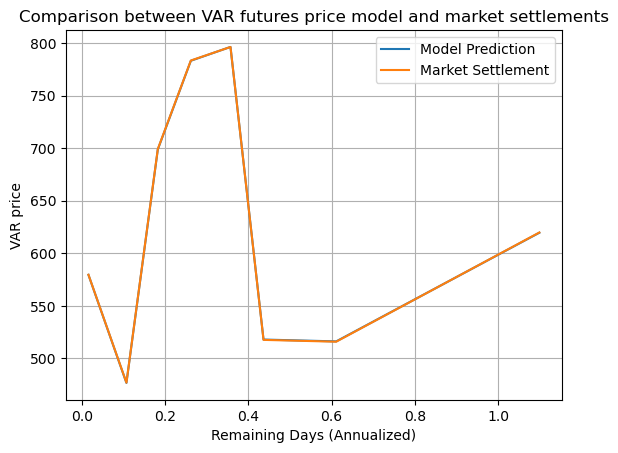

VIX futures :
VIX: Market = 22.67, Model = 22.64
VX/K5: Market = 22.35, Model = 22.51
VX/M5: Market = 21.89, Model = 22.23
VX/N5: Market = 21.75, Model = 22.01
VX/Q5: Market = 21.78, Model = 21.83
VX/U5: Market = 21.87, Model = 21.78
VX/V5: Market = 22.02, Model = 21.86
VX/X5: Market = 22.14, Model = 22.05
VX/Z5: Market = 22.25, Model = 22.37


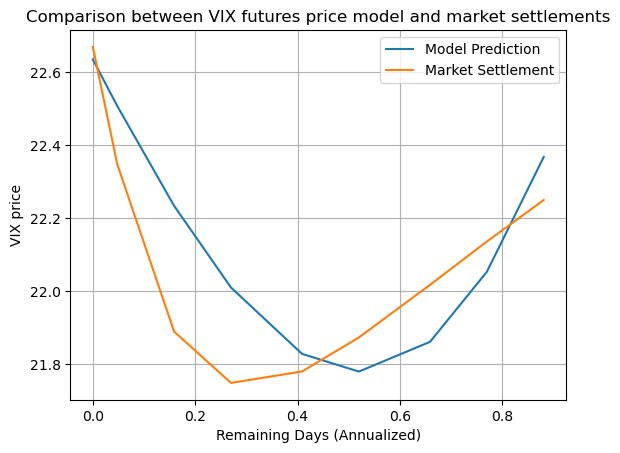

In [11]:
# Calculate model prices with calibrated parameters
print("\nModel vs Market Prices:\n")
accrued_total = var['ACCRUED']*var['elapsed_years']
model_price_var = variance_futures_price(
    var['remaining_years'],
    accrued_total, 
    Vt_calib, 
    l_calib, 
    theta_calib,
    xi_calib,
    var['total_years']
)
model_price_vix = pd.Series([vix_futures_price( 
        maturity,
        Vt_calib,
        l_calib,
        theta_calib,
        xi_calib,
    ) for maturity in vix['maturity_years']])
print("VAR futures :")
for s_var, market_var, model_var in zip(var['SYMBOL'],var['SETTLEMENT'],model_price_var):
    print(f"{s_var}: Market = {market_var:.2f}, Model = {model_var:.2f}")
plt.plot(var['remaining_years'], model_price_var, label="Model Prediction")
plt.plot(var['remaining_years'], var["SETTLEMENT"], label="Market Settlement")
plt.xlabel("Remaining Days (Annualized)")
plt.ylabel("VAR price")
plt.title("Comparison between VAR futures price model and market settlements")
plt.grid(True)
plt.legend()
plt.show()
print("VIX futures :")
for s_vix, market_vix, model_vix in zip(vix['SYMBOL'],vix['SETTLEMENT'],model_price_vix):
    print(f"{s_vix}: Market = {market_vix:.2f}, Model = {model_vix:.2f}")
plt.plot(vix['maturity_years'], model_price_vix, label="Model Prediction")
plt.plot(vix['maturity_years'], vix["SETTLEMENT"], label="Market Settlement")
plt.xlabel("Remaining Days (Annualized)")
plt.ylabel("VIX price")
plt.title("Comparison between VIX futures price model and market settlements")
plt.grid(True)
plt.legend()
plt.show()